In [3]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import scrapbook as sb 
import pandas as pd
import numpy as np 
import seaborn as sns 
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

## BaseLine Models 

We have used Random Forest, Catboost, Vanilla NN and Stats Model as the Baseline Model for the problem 

Importing data of baseline Models 

In [5]:
books = sb.read_notebooks("./BaseLine_Model_Output")
baseLine_data = []
for nb in books.notebooks: 
    nbList=[nb.scraps['Catboost MSE'].data,
            nb.scraps['Stats Model MSE'].data,
            nb.scraps['Random Forest MSE'].data,
            nb.scraps['Vanilla NN MSE'].data]
    baseLine_data.append(nbList)
print("BASELINE MODEL MSE VALUES")
df = pd.DataFrame(baseLine_data, columns = ["Catboost","Stats Model","Random Forest","Vanilla Neural Network"])
print(df)
print("MEAN:")
print(df.mean(axis = 0))
baseLine_data = np.array(baseLine_data)

BASELINE MODEL MSE VALUES
   Catboost  Stats Model  Random Forest  Vanilla Neural Network
0  0.134360     0.308435       0.182300                0.911658
1  0.088122     0.305280       0.123892                1.015526
2  0.101181     0.309786       0.173017                1.117976
3  0.093362     0.280718       0.178366                0.978198
4  0.115354     0.237479       0.198445                0.972637
5  0.088785     0.326439       0.119403                0.919878
6  0.097160     0.336741       0.228378                0.805377
7  0.078201     0.379283       0.121724                0.681750
8  0.076088     0.348601       0.101290                0.861582
9  0.136799     0.286368       0.207355                0.881409
MEAN:
Catboost                  0.100941
Stats Model               0.311913
Random Forest             0.163417
Vanilla Neural Network    0.914599
dtype: float64


## GAN 

Simple C-GAN was used to train the dataset 

In [20]:
book = sb.read_notebooks("./Main/GAN")
gan_data = []
gan_mse = []
for nb in book.notebooks:
    metrics = nb.scraps['GAN_1 Metrics'].data
    for i in range(1000):
        gan_mse.append(metrics[0][i])
    nbList = [nb.scraps['GAN Model MSE'].data,
              nb.scraps['GAN Model MAE'].data,
              nb.scraps['GAN Model Euclidean distance'].data,
              nb.scraps['GAN Model Manhattan Distance'].data,
              nb.scraps['GAN Model n_epochs'].data]        
    gan_data.append(nbList)
print("GAN Performance Metrics")
df = pd.DataFrame(gan_data, columns = ['MSE','MAE','Euclidean Distance','Manhattan Distance','Epochs'])
print(df)
print("MEAN:")
print(df.mean(axis = 0))
gan_data = np.array(gan_data)

GAN Performance Metrics
        MSE       MAE  Euclidean Distance  Manhattan Distance  Epochs
0  0.108423  0.251182            3.308940           25.369408     171
1  0.310981  0.371125            5.600692           37.483586     142
2  0.222287  0.312892            4.738119           31.602059    5000
3  0.382009  0.469235            6.210758           47.392747    5000
4  0.288838  0.324927            5.401011           32.817620    5000
5  0.213533  0.313193            4.643706           31.632467    5000
6  0.122288  0.262596            3.514324           26.522194    1983
7  0.244608  0.315503            4.966387           31.865806    5000
8  0.168282  0.312029            4.122393           31.514973     263
9  0.763354  0.560267            8.779184           56.586946    5000
MEAN:
MSE                      0.282460
MAE                      0.349295
Euclidean Distance       5.128551
Manhattan Distance      35.278780
Epochs                3255.900000
dtype: float64


## ABC_GAN Analysis

In [41]:
book = sb.read_notebooks("./Main")
paramVal = [[0,1],[0,0.1],[0,0.01],[1,1],[1,0.1],[1,0.01]]
abc_mse = [[] for i in range(6)]
abc_mse_skip = [[] for i in range(6)]
abc_mse_mean = [[] for i in range(6)]
abc_mse_skip_mean = [[] for i in range(6)]
abc_weights = [[] for i in range(6)]
abc_epochs = [[] for i in range(6)]

for nb in book.notebooks:
    metrics1 = np.array(nb.scraps['ABC_GAN_1 Metrics'].data)
    metrics2 = np.array(nb.scraps['ABC_GAN_2 Metrics'].data)
    metrics3 = np.array(nb.scraps['ABC_GAN_3 Metrics'].data)
    paramMean = float(nb.papermill_dataframe.iloc[0]['value'])
    paramVar = float(nb.papermill_dataframe.iloc[2]['value'])
    #Divide data according to parameters 
    for i in range(6):
        if paramMean == paramVal[i][0] and paramVar == paramVal[i][1]:
            for j in range(1000):
                abc_mse[i].append(metrics1[0,j])
                abc_mse_skip[i].append(metrics3[0,j])
            abc_epochs[i].append(nb.scraps['ABC-GAN Model n_epochs'].data)
            abc_weights[i].append(nb.scraps['Skip Connection Weight'].data)
            abc_mse_mean[i].append(mean(metrics1[0,:]))
            abc_mse_skip_mean[i].append(mean(metrics3[0,:]))

In [43]:
for i in range(6):
    data = []
    for j in range(len(abc_weights[i])):
        data.append([paramVal[i][0],paramVal[i][1],abc_weights[i][j],abc_mse_mean[i][j],abc_mse_skip_mean[i][j]])
    df = pd.DataFrame(data, columns = ['Mean','Variance','Weight','ABC_Mean','Skip Connection ABC Mean'])
    print(df)
    print(df.mean(axis=0))

   Mean  Variance    Weight  ABC_Mean  Skip Connection ABC Mean
0     0         1  0.995435  0.484575                  0.382880
1     0         1  0.994916  0.166499                  0.226205
Mean                        0.000000
Variance                    1.000000
Weight                      0.995176
ABC_Mean                    0.325537
Skip Connection ABC Mean    0.304542
dtype: float64
   Mean  Variance    Weight  ABC_Mean  Skip Connection ABC Mean
0     0       0.1 -0.114632  0.367175                  0.212413
1     0       0.1  0.291631  0.483154                  0.316918
Mean                        0.000000
Variance                    0.100000
Weight                      0.088499
ABC_Mean                    0.425164
Skip Connection ABC Mean    0.264665
dtype: float64
   Mean  Variance    Weight  ABC_Mean  Skip Connection ABC Mean
0     0      0.01  0.184615  0.188326                  0.381724
1     0      0.01  0.276582  0.310079                  0.256995
Mean                    

## Graphical Analysis 

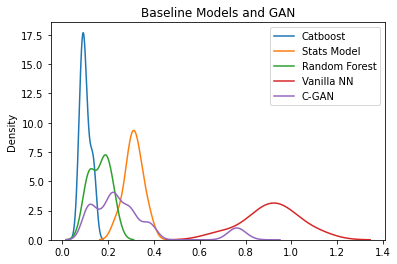

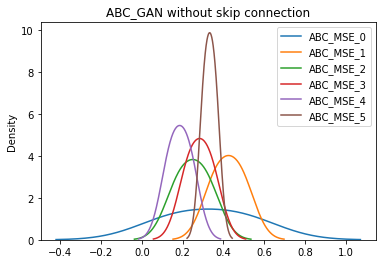

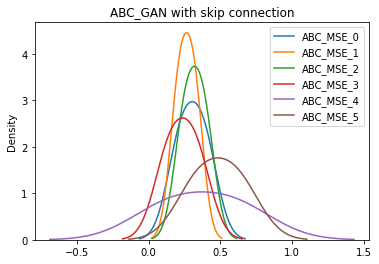

   Mean  Variance
0     0      1.00
1     0      0.10
2     0      0.01
3     1      1.00
4     1      0.10
5     1      0.01


In [50]:
#plt.hist(baseLine_data[:,0],bins=10,density=True,label = "Catboost")
sns.distplot(baseLine_data[:,0],hist=False,label="Catboost")
sns.distplot(baseLine_data[:,1],hist=False,label="Stats Model")
sns.distplot(baseLine_data[:,2],hist=False,label="Random Forest")
sns.distplot(baseLine_data[:,3],hist=False,label="Vanilla NN")
sns.distplot(gan_mse,hist=False,label="C-GAN")
plt.title("Baseline Models and GAN")
plt.legend()
plt.show()

plt.title("ABC_GAN without skip connection")
sns.distplot(abc_mse_mean[0],hist=False,label="ABC_MSE_0")
sns.distplot(abc_mse_mean[1],hist=False,label="ABC_MSE_1")
sns.distplot(abc_mse_mean[2],hist=False,label="ABC_MSE_2")
sns.distplot(abc_mse_mean[3],hist=False,label="ABC_MSE_3")
sns.distplot(abc_mse_mean[4],hist=False,label="ABC_MSE_4")
sns.distplot(abc_mse_mean[5],hist=False,label="ABC_MSE_5")
plt.legend()
plt.show()

plt.title("ABC_GAN with skip connection")
sns.distplot(abc_mse_skip_mean[0],hist=False,label="ABC_MSE_0")
sns.distplot(abc_mse_skip_mean[1],hist=False,label="ABC_MSE_1")
sns.distplot(abc_mse_skip_mean[2],hist=False,label="ABC_MSE_2")
sns.distplot(abc_mse_skip_mean[3],hist=False,label="ABC_MSE_3")
sns.distplot(abc_mse_skip_mean[4],hist=False,label="ABC_MSE_4")
sns.distplot(abc_mse_skip_mean[5],hist=False,label="ABC_MSE_5")
plt.legend()
plt.show()

df = pd.DataFrame(paramVal, columns = ['Mean','Variance'])
print(df)
